# Project 1: Relationship of Terrorist network.


## Students

* Team: 29
* Students: Nicolas Bollier, Enea Figini, Axel Nilsson, Elias Le Boudec
* Dataset: Terrorist Relations

![Alt text](img/friends.png)

## Objective

To What extent is a network of terrorists similar to a social network?

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import sparse

### Loading the reference data

In [2]:
adjacency = np.load('./data/TerroristRel/adjacency_matrix.npy')

In [3]:
data = np.load('./data/TerroristRel/data.npy')
labels_raw = data[:,-4:]
labels = (labels_raw[:,0] == 'colleague')*1.+\
            (labels_raw[:,1] == 'congregate')*2.+\
            (labels_raw[:,2] == 'contact')*3.+\
            (labels_raw[:,3] == 'family')*4.

In [4]:
print("Nubmer of edges is:",np.sum(np.triu(adjacency)))

Nubmer of edges is: 8195


### First visualization of the reference data

In [5]:
graph = nx.from_scipy_sparse_matrix(sparse.csr_matrix(adjacency))

coords = nx.spring_layout(graph,dim = 2,k =.1,seed=0)

/Users/axel/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


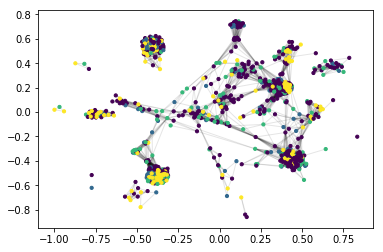

In [6]:
nx.draw_networkx_nodes(graph, coords, node_size=10, 
                           node_alpha=1.,node_color=labels)
nx.draw_networkx_edges(graph, coords, alpha=0.1)
pass

## Proprieties of Social networks:

### Homophily:

Is the tendency of individuals to associate and bond with similar others.

#### Krawczyk et al. - 2011 - Line graphs as social networks

"These results suggest, that a line graph, constructed on a scale-free network, is a fair representation of a realistic social network "

### Transitivity:
A is related to B , B related to B , then A related to C

For a graph G with n vertices and m edges, the number of vertices of the line graph L(G) is m, and the number of edges of L(G) is half the sum of the squares of the degrees of the vertices in G, minus m.

Harary, F. (1972), "8. Line Graphs", Graph Theory, Massachusetts: Addison-Wesley, pp. 71–83.

G(n,m)

L( m , $\frac{\sum d_i^2}{2} -m$)

we know that our dataset had n = 851 nodes and 8195 Edges

$\sum d_i^2 = (8195 +851 )*2 = 18 092$

Therefore The average degree of one node of the original dataset is:

$ \bar{d_i} = \sqrt{\frac{18 092}{851}} = 4,61$

We know from previous milestones that there are 13 connected components, therefore we know that the network cannot be modeled with only one scale free graph

In [7]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    # For convenience
    A = adjacency
    N = A.shape[0]

    # Number of components initialization
    nComponents = 1
    
    # Mapping between nodes and components:
    # Node ~ row index in range(N) mapped to a integer
    # (the id of the component)
    componentMapping = np.zeros([N,1])
    componentMapping[0] = 1
    
    # First, find which node belongs to which component
    # Starting from node 2, look for nodes connected to each node
    for i in range(1, N):
        for j in range(N):
            # Check all neighbors
            if i != j and A[i,j] != 0:
                # We found a neighbor!
                break
        if j == N-1 or componentMapping[j] == 0:
            # Either the node is isolated (j == N-1),
            # or the neighbor is not mapped to a component yet.
            # Hence, we need to create a new component.
            nComponents = nComponents + 1
            currentComponent = nComponents
        else:
            # We found a neighbor already mapped to a component.
            currentComponent = componentMapping[j]
        componentMapping[i] = currentComponent
    
    # Now, For each component, build the adjacency matrix:
    adjacencyMatricesList = list();
    for component in range(1,nComponents+1):
        # Size of component
        N_component = np.sum(componentMapping == component);
        indices = componentMapping == component;
        adjacencyMatricesList.append(A[indices@indices.T].reshape((N_component,N_component)))
                
    return adjacencyMatricesList, componentMapping

In [8]:
largestConnectedComponent = max(find_components(adjacency)[0], key = len)
NlargestConnectedComponent = len(largestConnectedComponent)

In [9]:
print("Largest connected component has paramater",np.size(largestConnectedComponent,0),"nodes and",np.sum(np.triu(largestConnectedComponent)), "edges")  

Largest connected component has paramater 116 nodes and 1484 edges


## Construction of a scale free-network

Scale free network have the following parameters:
$\alpha, \beta, \gamma$ and $\alpha+ \beta+ \gamma = 1$ 

$\alpha$ – Probability for adding a new node connected to an existing node chosen randomly according to the in-degree distribution.

$\beta$ – Probability for adding an edge between two existing nodes. One existing node is chosen randomly according the in-degree distribution and the other chosen randomly according to the out-degree distribution.

$\gamma$ – Probability for adding a new node conected to an existing node chosen randomly according to the out-degree distribution.

In [10]:
n = 70
#GD = nx.scale_free_graph(n, alpha=0.30, beta=0.44, gamma=0.26, delta_in=0.7, delta_out=0, create_using=None, seed=1)
GD = nx.scale_free_graph(n,alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None,seed=1)
G= GD.to_undirected()
G.number_of_edges()

137

/Users/axel/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


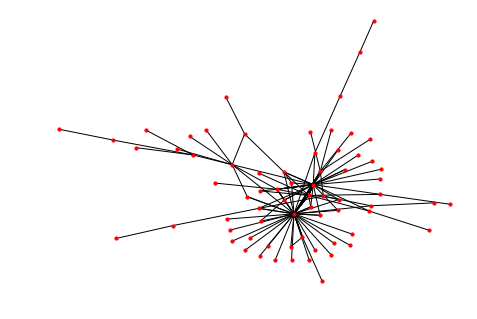

In [11]:
nx.draw_spring(G,node_size=10,node_alpha=1., edge_alpha=0.1)

In [12]:
L = nx.line_graph(G)

print("The line graph of the scale free network has",G.number_of_edges(),"nodes and", L.number_of_edges(),"edges")

The line graph of the scale free network has 137 nodes and 2737 edges


/Users/axel/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


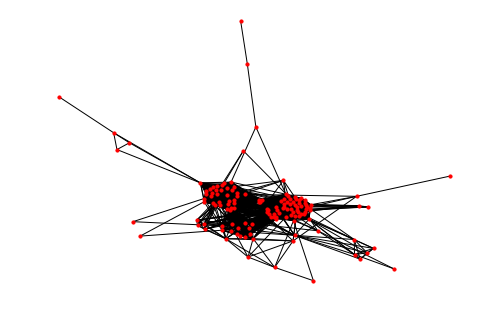

In [13]:
nx.draw_spring(L,node_size=10,node_alpha=1., edge_alpha=0.1)

## Degree distribution comparison

In [15]:
degreeL = np.squeeze(np.asarray(AdjL.sum(0)))
weightsL = np.ones_like(degreeL) / len(degreeL)
plt.hist(degreeL, weights=weightsL);

degree = largestConnectedComponent.sum(0)
weights = np.ones_like(degree) / len(degree)
plt.hist(degree, weights=weights);

plt.xlabel('Degree')
plt.ylabel('Proportion of nodes')
plt.title('Degree Distribution')
pass

NameError: name 'AdjL' is not defined